<a href="https://colab.research.google.com/github/reshma-03/IISc-Projects/blob/main/Copy_of_M3_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1V3Y8Q3M03Atn9oM1zqmW6jpuzSYm445e/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [1]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [2]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [3]:
# YOUR CODE HERE
Tess_files = glob.glob("Tess/*/*.wav")
Ravdess_files = glob.glob("ravdess/*/*.wav")

In [5]:
tess_dict = {
    'filename': [],
    'data': [],
    'samplerate': [],
    'actress': [],
    'label': [],
    'emotion': []
}

for file in Tess_files:
    data, samplerate = soundfile.read(file)
    tess_dict['filename'].append(file)
    tess_dict['data'].append(data)
    tess_dict['samplerate'].append(samplerate)
    tess_dict['actress'].append(file.split('/')[-1].split('.')[0].split('_')[0])
    tess_dict['label'].append(file.split('/')[-1].split('.')[0].split('_')[1])
    tess_dict['emotion'].append(file.split('/')[-1].split('.')[0].split('_')[2])

In [6]:
tess = pd.DataFrame.from_dict(tess_dict)
tess.head()

,filename,data,samplerate,actress,label,emotion
0,Tess/OAF_surprised/OAF_bite_surprised.wav,"[0.0, -6.103515625e-05, 3.0517578125e-05, -9.1...",24414,OAF,bite,surprised
1,Tess/OAF_surprised/OAF_sail_surprised.wav,"[0.0, -6.103515625e-05, -0.000152587890625, -0...",24414,OAF,sail,surprised
2,Tess/OAF_surprised/OAF_pain_surprised.wav,"[0.0, -0.000152587890625, -0.0001220703125, -0...",24414,OAF,pain,surprised
3,Tess/OAF_surprised/OAF_half_surprised.wav,"[0.0, -3.0517578125e-05, -0.00018310546875, -0...",24414,OAF,half,surprised
4,Tess/OAF_surprised/OAF_gun_surprised.wav,"[0.0, -0.0001220703125, -9.1552734375e-05, -0....",24414,OAF,gun,surprised


In [11]:
ravdess_dict = {
    'filename': [],
    'data': [],
    'samplerate': [],
    'modality': [],
    'vocal_channel': [],
    'emotion': [],
    'emotional_intensity': [],
    'statement': [],
    'repetition': [],
    'actor': []
}

for file in Ravdess_files:
    data, samplerate = soundfile.read(file)
    ravdess_dict['filename'].append(file)
    ravdess_dict['data'].append(data)
    ravdess_dict['samplerate'].append(samplerate)
    ravdess_dict['modality'].append(file.split('/')[-1].split('.')[0].split('-')[0])
    ravdess_dict['vocal_channel'].append(file.split('/')[-1].split('.')[0].split('-')[1])
    ravdess_dict['emotion'].append(file.split('/')[-1].split('.')[0].split('-')[-1].split('_')[-1])
    ravdess_dict['emotional_intensity'].append(file.split('/')[-1].split('.')[0].split('-')[3])
    ravdess_dict['statement'].append(file.split('/')[-1].split('.')[0].split('-')[4])
    ravdess_dict['repetition'].append(file.split('/')[-1].split('.')[0].split('-')[5])
    # Add the missing 'actor' field
    ravdess_dict['actor'].append(file.split('/')[-1].split('.')[0].split('-')[2])



In [12]:
ravdess = pd.DataFrame.from_dict(ravdess_dict)
ravdess.head()

,filename,data,samplerate,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,ravdess/Actor_08/03-01-08-01-01-02-08_surprise...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,03,01,surprised,01,01,02,08
1,ravdess/Actor_08/03-01-05-02-01-02-08_angry.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,03,01,angry,02,01,02,05
2,ravdess/Actor_08/03-01-03-01-01-02-08_happy.wav,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",16000,03,01,happy,01,01,02,03
3,ravdess/Actor_08/03-01-03-02-02-02-08_happy.wav,"[-6.103515625e-05, -3.0517578125e-05, -6.10351...",16000,03,01,happy,02,02,02,03
4,ravdess/Actor_08/03-01-04-02-02-02-08_sad.wav,"[0.0, 0.0, 0.0, 3.0517578125e-05, 6.103515625e...",16000,03,01,sad,02,02,02,04


In [13]:
len(Tess_files), len(Ravdess_files)

(2679, 1168)

#### Play the sample audio

In [14]:
# YOUR CODE HERE
ipd.Audio(Tess_files[0])

In [15]:
# YOUR CODE HERE
ipd.Audio(Ravdess_files[0])

### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

In [16]:
# Function to extract emotion label from TESS file name
def extract_tess_emotion(filename):
    return filename.split('/')[-1].split('_')[-1].split('.')[0]

# Function to extract emotion label from Ravdess file name
def extract_ravdess_emotion(filename):
    return filename.split('/')[-1].split('_')[-1].split('.')[0]


# Path to TESS data (update with your local path)
tess_files = glob.glob("Tess/*/*.wav")
emotions_tess = [extract_tess_emotion(filename) for filename in tess_files]
labels_tess = pd.Series(emotions_tess)

# Path to Ravdess data (update with your local path)
ravdess_files = glob.glob("ravdess/*/*.wav")
emotions_ravdess = [extract_ravdess_emotion(filename) for filename in ravdess_files]
labels_ravdess = pd.Series(emotions_ravdess)

print("Distribution of emotions in TESS dataset:")
print(labels_tess.unique())

print("\nDistribution of emotions in Ravdess dataset:")
print(labels_ravdess.unique())

Distribution of emotions in TESS dataset:
['surprised' 'fear' 'angry' 'neutral' 'happy' 'sad' 'disgust']

Distribution of emotions in Ravdess dataset:
['surprised' 'angry' 'happy' 'sad' 'neutral' 'fear' 'disgust']


In [17]:
import seaborn as sns

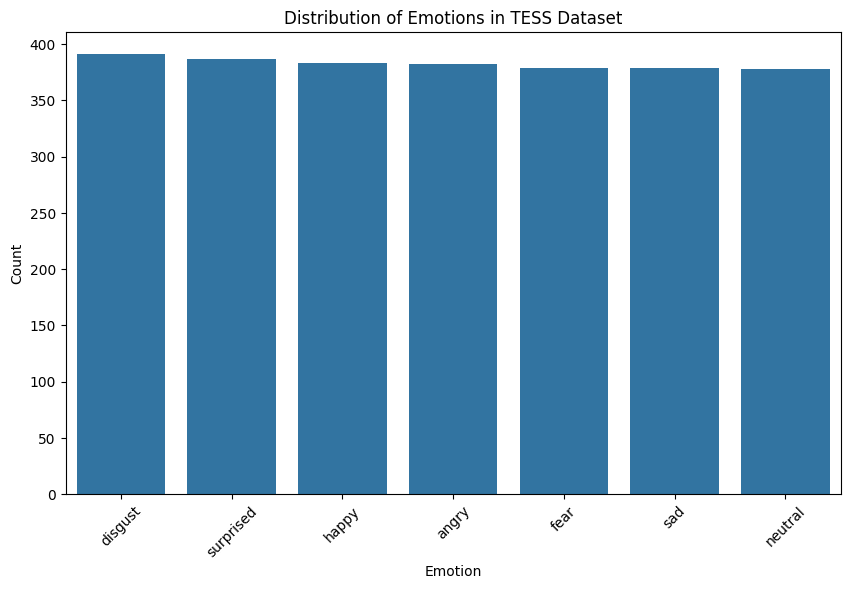

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=labels_tess, order=labels_tess.value_counts().index)
plt.title('Distribution of Emotions in TESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#tess['emotion'].value_counts().plot(kind='bar')

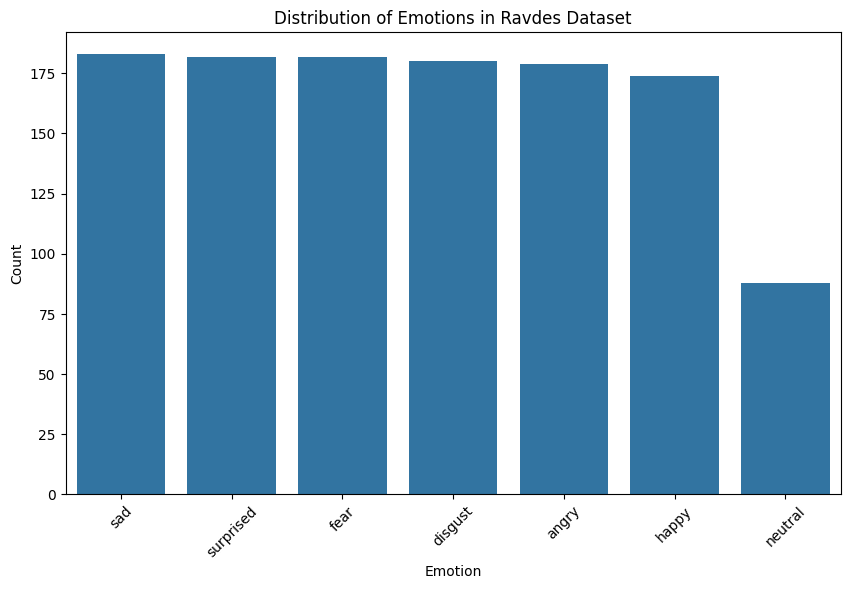

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=labels_ravdess, order=labels_ravdess.value_counts().index)
plt.title('Distribution of Emotions in Ravdes Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Visualize sample audio signal using librosa

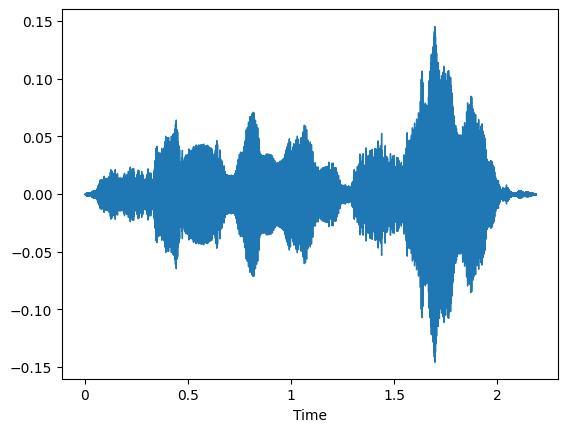

In [148]:
# YOUR CODE HERE
librosa.display.waveshow(tess.loc[1, 'data'], sr=tess.loc[1, 'samplerate'])

In [21]:
word = 'wife'
word_df = tess[tess['label'] == word]
emotions = list(sorted(word_df['emotion'].unique()))
actresses = list(sorted(word_df['actress'].unique()))

from ipywidgets import Output, GridspecLayout, Layout
grid = GridspecLayout(len(actresses)*2, len(emotions), align_items='center')

for i, actress in enumerate(actresses):
    for j, emotion in enumerate(emotions):
        try:
            data = word_df[(word_df['emotion'] == emotion) & (word_df['actress'] == actress)].loc[: , 'data'].values[0]
            samplerate = word_df[(word_df['emotion'] == emotion) & (word_df['actress'] == actress)]['samplerate'].values[0]
            filename = word_df[(word_df['emotion'] == emotion) & (word_df['actress'] == actress)].loc[: , 'filename'].values[0]

            out = Output()
            with out:
                fig, ax = plt.subplots(figsize=(5, 1))
                librosa.display.waveshow(data, sr=samplerate, ax=ax)
                ax.set_title(f'Actress: {actress}, Emotion: {emotion}')
                plt.close(fig)
                ipd.display(ax.figure)
            grid[2*i, j] = out

            out = Output()
            with out:
                ipd.display(ipd.Audio(filename))
            grid[2*i+1, j] = out
        except:
            pass

ipd.display(grid)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

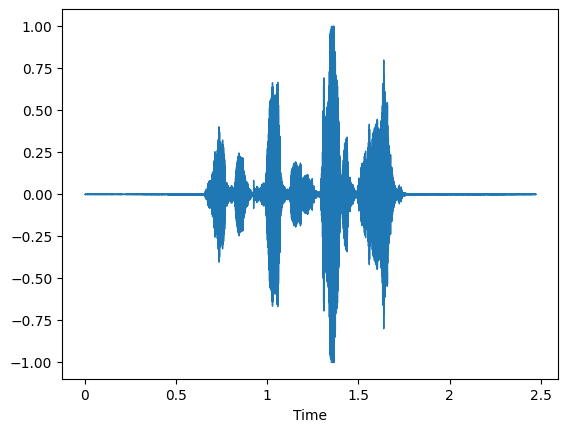

In [149]:
# YOUR CODE HERE
librosa.display.waveshow(ravdess.loc[1, 'data'], sr=tess.loc[1, 'samplerate'])

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [23]:
!pip install librosa
import librosa
import numpy as np
import re

In [24]:
# YOUR CODE HERE


def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute mfcc
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result


In [25]:
sample_feature_tess = extract_feature(Tess_files[0]) #,mfcc=True, chroma=True, mel=True)
sample_feature_ravdess = extract_feature(Ravdess_files[0]) #,mfcc=True, chroma=True, mel=True)
print(sample_feature_tess.shape)
print(sample_feature_ravdess.shape)

(180,)
(180,)


In [26]:
# Declare list to append features and labels
features, labels = [], []

for wv_file in Tess_files:
  features.append(extract_feature(wv_file))
  labels.append(extract_tess_emotion(wv_file))

for wv_file in Ravdess_files:
  features.append(extract_feature(wv_file))
  labels.append(extract_ravdess_emotion(wv_file))

#print(len(features), len(labels))

3847 3847


In [27]:
print(set(labels))

{'happy', 'angry', 'fear', 'sad', 'neutral', 'disgust', 'surprised'}


#### Create a dictionary or a function to encode the emotions

In [89]:
# YOUR CODE HERE
print(labels_tess.unique())

print(labels_ravdess.unique())

emotion_encoding =  {'neutral': 0, 'angry': 1, 'disgust': 2, 'fear': 3, 'sad': 4, 'happy': 5, 'surprised': 6}
#emotion_encoding =  {'neutral': 'neutral', 'angry': 'angry', 'disgust': 'disgust', 'fear': 'fear', 'sad': 'sad', 'happy': 'happy', 'surprised': 'surprised'}

print(emotion_encoding)

['surprised' 'fear' 'angry' 'neutral' 'happy' 'sad' 'disgust']
['surprised' 'angry' 'happy' 'sad' 'neutral' 'fear' 'disgust']
{'neutral': 0, 'angry': 1, 'disgust': 2, 'fear': 3, 'sad': 4, 'happy': 5, 'surprised': 6}


In [91]:
tess['label'] = labels_tess.map(emotion_encoding)
ravdess['label'] = labels_ravdess.map(emotion_encoding)

#### TESS data feature extraction

In [92]:
# YOUR CODE HERE
features_Tess = []
for filename in Tess_files:
  features_Tess.append(extract_feature(filename))

#### Ravdess data feature extraction

In [93]:
# YOUR CODE HERE
features_Ravdess = []
for filename in Ravdess_files:
  features_Ravdess.append(extract_feature(filename))

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [111]:
# YOUR CODE HERE
tess_df = pd.DataFrame(features_Tess)
tess_df['label'] = tess['label']
#tess_df['label'] = labels_tess

In [115]:
ravdees_df = pd.DataFrame(features_Ravdess)
ravdees_df['label'] = ravdess['label']
#ravdees_df['label'] = labels_ravdess

In [113]:
tess_df.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,label
0,-437.920013,73.299049,13.479185,3.243489,9.323157,-3.971268,-6.414124,5.811415,-15.687618,-2.849247,...,0.000437,0.000301,0.000479,0.000369,0.000260,0.000205,0.000157,0.000069,0.000005,6
1,-411.453522,64.683586,15.502349,-5.014569,-8.626382,-5.206890,-11.337915,-0.304360,-15.942957,-1.311298,...,0.001369,0.002164,0.001713,0.001488,0.001295,0.000974,0.000886,0.000429,0.000025,6
2,-403.144073,77.245491,7.641733,6.845827,3.532720,-5.360589,-14.961371,0.168502,-12.826844,-11.419881,...,0.000686,0.000880,0.000706,0.000569,0.000567,0.000399,0.000441,0.000219,0.000015,6
3,-380.920044,82.906822,-10.538331,-17.110846,2.728152,0.704234,-11.843532,5.594142,-11.098066,0.238773,...,0.001347,0.001181,0.001142,0.000899,0.000610,0.000510,0.000322,0.000128,0.000007,6
4,-421.720581,83.599411,8.484735,-3.906103,7.259039,0.361912,-11.678505,-1.038350,-15.822961,-4.571904,...,0.001199,0.001327,0.001004,0.000625,0.000540,0.000504,0.000278,0.000125,0.000009,6


In [154]:
df_features=pd.concat([tess_df,ravdees_df])
df_features.shape

(3847, 181)

#### Split the data into train and test

In [155]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(df_features.drop('label', axis=1), df_features['label'], test_size=0.2, random_state=42)

In [156]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3077, 180), (770, 180), (3077,), (770,))

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [158]:
# YOUR CODE HERE
# Standardize the features
scaler = StandardScaler()
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report


In [124]:
# Dictionary to store models and their results
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier()
}

In [125]:
results = {}

for model_name, model in models.items():
    accuracy, report = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'accuracy': accuracy, 'report': report}

In [126]:
# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['report'])
    print("\n" + "="*60 + "\n")

Model: DecisionTree
Accuracy: 0.7454545454545455
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        93
           1       0.79      0.75      0.77       114
           2       0.74      0.73      0.73       115
           3       0.74      0.72      0.73       116
           4       0.77      0.77      0.77       115
           5       0.62      0.67      0.64        91
           6       0.74      0.71      0.72       126

    accuracy                           0.75       770
   macro avg       0.74      0.75      0.75       770
weighted avg       0.75      0.75      0.75       770



Model: RandomForest
Accuracy: 0.8727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        93
           1       0.92      0.89      0.90       114
           2       0.80      0.86      0.83       115
           3       0.92      0.82      0

In [127]:
# Find and print the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model_accuracy = results[best_model_name]['accuracy']
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

The best model is RandomForest with an accuracy of 0.87


#### Apply the voting classifier

In [128]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC(probability=True)  # Enable probability estimates for soft voting
knn = KNeighborsClassifier()

In [129]:
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('svc', svc),
        ('knn', knn)
    ],
    voting='soft'  # Use 'soft' for averaging predicted probabilities
)

In [130]:
# YOUR CODE HERE
# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Voting Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Voting Classifier Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        93
           1       0.91      0.85      0.88       114
           2       0.82      0.85      0.84       115
           3       0.87      0.84      0.85       116
           4       0.83      0.85      0.84       115
           5       0.75      0.78      0.76        91
           6       0.87      0.87      0.87       126

    accuracy                           0.85       770
   macro avg       0.85      0.85      0.85       770
weighted avg       0.85      0.85      0.85       770



### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [135]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
team_data_files = glob.glob('/content/drive/MyDrive/CDS Classification Audio Data/*/*.wav')
len(team_data_files)

42

In [137]:
team_data_dict = {
    'filename': [],
    'data': [],
    'samplerate': [],
    'member_name': [],
    'label': [],
    'emotion': []
}

for file in team_data_files:
    data, samplerate = soundfile.read(file)
    team_data_dict['filename'].append(file)
    team_data_dict['data'].append(data)
    team_data_dict['samplerate'].append(samplerate)
    team_data_dict['member_name'].append(file.split('/')[-1].split('.')[0].split('_')[0])
    team_data_dict['label'].append(file.split('/')[-1].split('.')[0].split('_')[1])
    team_data_dict['emotion'].append(file.split('/')[-1].split('.')[0].split('_')[2])

In [138]:
# call the function to record a sample
team_data = pd.DataFrame.from_dict(team_data_dict)
team_data.head(10)

,filename,data,samplerate,member_name,label,emotion
0,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Neutral
1,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Sad
2,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Happy
3,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Angry
4,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Fear
5,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Book,Disgust
6,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Time,Neutral
7,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Time,Sad
8,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Time,Happy
9,/content/drive/MyDrive/CDS Classification Audi...,"[0.0, -3.0517578125e-05, -3.0517578125e-05, -3...",48000,Siva,Time,Angry


#### Extracting features of team data and combine with TESS + Ravdess

In [139]:
# Function to extract features from audio files
def extract_feature(file_name):
    # Load audio
    X, sample_rate = librosa.load(file_name)
    # Apply stft
    stft = np.abs(librosa.stft(X))
    result = np.array([])
    # Compute MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))
    # Compute chroma features
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))
    # Compute mel spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    return result

# Extract features for team data
team_features = []
team_labels = []

for file in team_data_files:
    features = extract_feature(file)
    team_features.append(features)
    # Extract label from filename, you can use a placeholder if needed
    label = file.split('/')[-1].split('_')[0]  # Assuming filename format 'sample_X.wav'
    team_labels.append(label)

# Create DataFrame for team data
team_df = pd.DataFrame(team_features)
team_df['label'] = team_labels

In [140]:
# Create DataFrame for team data
team_df = pd.DataFrame(team_features)
team_df['label'] = team_labels

In [141]:
# Combine features
df_final_features = pd.concat([df_features, team_df.drop(columns=['label'])], ignore_index=True)

# Combine labels
df_final_labels = pd.concat([df_labels, pd.Series(team_labels)], ignore_index=True)


In [142]:
df_combined = pd.concat([df_final_features, df_final_labels], axis=1)
df_combined.to_csv('combined_data.csv', index=False)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_final_labels, test_size=0.2, random_state=42)

#### Train the different ML algorithms

#### Test the best working model with live audio recording

In [150]:
# YOUR CODE HERE
# Standardize the features
scaler = StandardScaler()
X_train = X_train.select_dtypes(include=['number']) # Select only numerical columns
X_test = X_test.select_dtypes(include=['number'])  # Select only numerical columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report


In [ ]:
# Dictionary to store models and their results
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier()
}

In [ ]:
results = {}

for model_name, model in models.items():
    accuracy, report = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {'accuracy': accuracy, 'report': report}

In [145]:
# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['report'])
    print("\n" + "="*60 + "\n")

Model: DecisionTree
Accuracy: 0.7454545454545455
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        93
           1       0.79      0.75      0.77       114
           2       0.74      0.73      0.73       115
           3       0.74      0.72      0.73       116
           4       0.77      0.77      0.77       115
           5       0.62      0.67      0.64        91
           6       0.74      0.71      0.72       126

    accuracy                           0.75       770
   macro avg       0.74      0.75      0.75       770
weighted avg       0.75      0.75      0.75       770



Model: RandomForest
Accuracy: 0.8727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        93
           1       0.92      0.89      0.90       114
           2       0.80      0.86      0.83       115
           3       0.92      0.82      0

In [146]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
# choose the best working model and assign below
MODEL = KNN_model
emotions={'neutral': 'neutral', 'angry': 'angry', 'disgust': 'disgust', 'fear': 'fear', 'sad': 'sad', 'happy': 'happy', 'surprised': 'surprised'}

In [147]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

sad


### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
